In [ ]:

import numpy as np
import matplotlib.pyplot as plt
plt.clf()
plt.figure(dpi=600)
fig = plt.figure()
attn_vis = attn[0].to('cpu').detach().numpy().sum(axis=2)
plt.imshow(attn_vis)
plt.gca().set_aspect(0.2)
plt.colorbar()
plt.savefig('out/view_attn.pdf', bbox_inches='tight')

In [1]:
import torch
import numpy
from gnt.feature_network import ResUNet
feature_net = ResUNet(
            coarse_out_ch=32,
            fine_out_ch=32,
            single_net=True,
        ).to("cuda:1")
checkpoint = torch.load('./out/gnt_full/model_720000.pth')
feature_net.load_state_dict(checkpoint['feature_net'])


img = torch.from_numpy(numpy.load('out/gt_img.npy')).to("cuda:1")
out = feature_net(img.permute(2,0,1).unsqueeze(0))[2]
print(out.shape)
numpy.save("out/gt_feat.npy", out.to('cpu').detach().numpy())

torch.Size([1, 256, 192, 252])


In [13]:
import torch
import numpy as np
agg_feat_2d = torch.from_numpy(np.load("out/feat_2d.npy")).to("cuda:1")
roi = agg_feat_2d[::30, ::30,:]

# out = torch.from_numpy(np.load("out/gt_feat.npy")).to("cuda:1")
# print(feat_2d.shape, roi.shape, out.shape)

keys = out #/ out.norm(dim=1, keepdim=True)
queries = roi #/ roi.norm(dim=1, keepdim=True)
h, w, c,_ = queries.shape
queries = queries.reshape(h*w, c, -1).unsqueeze(-1)
print(h,w,queries.shape, keys.shape)

13 17 torch.Size([221, 256, 1, 1]) torch.Size([1, 256, 192, 252])


In [14]:

attn = torch.nn.functional.conv2d(keys, queries, stride=1)

attn = attn.reshape(h, w, 192, 252).to('cpu').detach().numpy()

print(attn.shape)

(13, 17, 192, 252)


In [55]:

attn = attn > 0

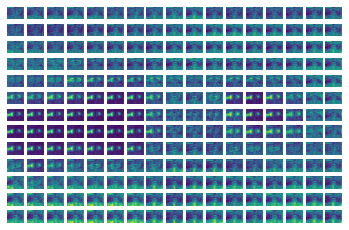

In [47]:
import matplotlib.pyplot as plt
fig,a =  plt.subplots(h,w)
for i, per_img_masks in enumerate(attn):
    for j, per_mask in enumerate(per_img_masks):
        norm_mask = per_mask / np.linalg.norm(per_mask)
        a[i][j].set_axis_off()
        a[i][j].imshow(norm_mask)
plt.axis("off")
plt.savefig('out/feat_attn.pdf', bbox_inches='tight')

In [60]:
import torch
import numpy as np
agg_feat_2d = torch.from_numpy(np.load("out/feat_2d.npy")).to("cuda:1")
roi = agg_feat_2d[250:252, 190:192, 32:]

keys = out / out.norm(dim=0, keepdim=True)
queries = roi / roi.norm(dim=1, keepdim=True)
attn = queries @ keys.reshape(keys.shape[0], -1)
h, w = attn.shape[:2]
attn = attn.reshape(h, w, 192, 252).to('cpu').detach().numpy()


In [15]:
import torch

# 定义 query 和 key tensor
query = torch.randn(1, 13, 17, 256)
key = torch.randn(1, 100, 200, 256)

# 将 query 和 key 分别转换为形状为 (1, 256, 13, 17) 和 (1, 256, 100, 200) 的 tensor
query = query.permute(0, 3, 1, 2)
key = key.permute(0, 3, 1, 2)

# 使用 2D 卷积计算 correlation map
corr_map = torch.nn.functional.conv2d(key, query, stride=1)

# 转换 correlation map 的形状为 (1, 13, 17, 100, 200)
corr_map = corr_map.permute(0, 2, 3, 1)


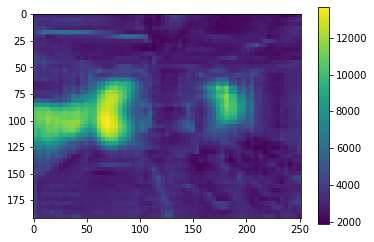

In [66]:
norm_mask = attn[6][6] # / np.linalg.norm(attn[1][5])
np.min(norm_mask)
# norm_mask = norm_mask > 0.9
plt.imshow(norm_mask)
plt.colorbar()

In [52]:
keys.unique()

tensor([0.0000e+00, 2.3842e-07, 2.2650e-06,  ..., 1.4947e+01, 1.5070e+01,
        1.5281e+01], device='cuda:1', grad_fn=<Unique2Backward0>)

In [59]:
np.unique(attn)

array([  816.6812 ,   828.1697 ,   837.22675, ..., 24605.648  ,
       24631.363  , 24807.953  ], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
for pose in all_poses:
    # 姿态的位置信息
    position = pose[:3, 3]
    x, y, z = position

    # 姿态的旋转信息
    rotation = pose[:3, :3]

    # 绘制位置
    ax.scatter(x, y, z, c='r', marker='o')

    # 绘制方向箭头
    arrow_length = 0.1
    ax.quiver(x, y, z, rotation[0, 0], rotation[1, 0], rotation[2, 0], length=arrow_length, color='r')
    ax.quiver(x, y, z, rotation[0, 1], rotation[1, 1], rotation[2, 1], length=arrow_length, color='g')
    ax.quiver(x, y, z, rotation[0, 2], rotation[1, 2], rotation[2, 2], length=arrow_length, color='b')


# # 设置坐标轴范围
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
# ax.set_zlim([zmin, zmax])

# 显示图形
plt.show()



In [2]:
import torch
import re
model1 = torch.load("./out/gnt_semantic_lr2/model_050000.pth")
print(model1['sem_seg_head'].keys())

odict_keys(['scale_heads.0.0.weight', 'scale_heads.0.0.norm.weight', 'scale_heads.0.0.norm.bias', 'scale_heads.1.0.weight', 'scale_heads.1.0.norm.weight', 'scale_heads.1.0.norm.bias', 'scale_heads.2.0.weight', 'scale_heads.2.0.norm.weight', 'scale_heads.2.0.norm.bias', 'scale_heads.2.2.weight', 'scale_heads.2.2.norm.weight', 'scale_heads.2.2.norm.bias', 'scale_heads.3.0.weight', 'scale_heads.3.0.norm.weight', 'scale_heads.3.0.norm.bias', 'scale_heads.3.2.weight', 'scale_heads.3.2.norm.weight', 'scale_heads.3.2.norm.bias', 'scale_heads.3.4.weight', 'scale_heads.3.4.norm.weight', 'scale_heads.3.4.norm.bias', 'predictor.weight', 'predictor.bias'])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


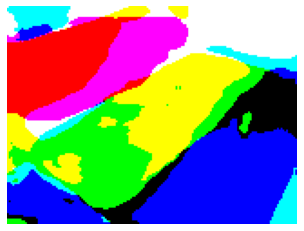

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


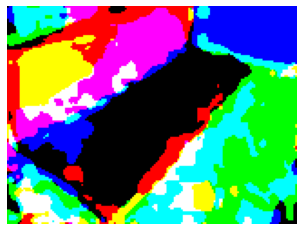

array([[[-241657.78  , -176890.16  ,  -24700.727 ],
        [-386648.62  , -146509.88  ,   31966.164 ],
        [-401092.84  ,  -71429.3   ,   35895.52  ],
        ...,
        [-248750.5   , -491032.    ,  231870.69  ],
        [-228022.61  , -462346.88  ,  197957.5   ],
        [-102674.81  , -366027.03  ,  100520.64  ]],

       [[-382589.6   , -203900.16  ,   35013.55  ],
        [-591201.    , -176810.61  ,  111747.89  ],
        [-608248.94  ,  -81819.29  ,  112550.266 ],
        ...,
        [-393787.97  , -625213.1   ,  330356.03  ],
        [-366675.06  , -589336.    ,  289738.78  ],
        [-191175.3   , -448341.84  ,  159606.42  ]],

       [[-421079.38  , -210795.11  ,   52512.273 ],
        [-640563.1   , -189559.88  ,  130144.44  ],
        [-668642.9   ,  -99839.35  ,  130956.92  ],
        ...,
        [-403496.53  , -651665.2   ,  356343.88  ],
        [-372553.28  , -611105.4   ,  310984.62  ],
        [-194858.72  , -464177.5   ,  177350.12  ]],

       ...,

      

In [1]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import torch
def calc_pca(emb, vis=False):
    X = emb.flatten(0, -2).cpu().numpy()
    np.random.seed(80)
    pca = PCA(n_components=3)
    pca.fit(X)
    X_rgb = pca.transform(X).reshape(*emb.shape[:2], 3)
    if vis:
        plt.imshow(X_rgb)
        plt.axis("off")
        plt.show()
    return X_rgb

agg_feat_2d = np.load("out/agg_feat_2d.npy")
agg_feat_2d = torch.from_numpy(agg_feat_2d)
calc_pca(agg_feat_2d, vis=True)

cnn_feat_2d = np.load("out/cnn_feat_2d.npy")
cnn_feat_2d = torch.from_numpy(cnn_feat_2d).permute(1,2,0)
calc_pca(cnn_feat_2d, vis=True)